<a href="https://colab.research.google.com/github/RenzoAlvaroshan/Tensorflow-Tutorial/blob/master/TF_2_0_ANN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
try:
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

2.2.0-rc4


In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

11493376/11490434 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


In [0]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2976 - accuracy: 0.9126 - val_loss: 0.1333 - val_accuracy: 0.9611
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1438 - accuracy: 0.9570 - val_loss: 0.1002 - val_accuracy: 0.9696
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1097 - accuracy: 0.9668 - val_loss: 0.0848 - val_accuracy: 0.9733
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0884 - accuracy: 0.9728 - val_loss: 0.0795 - val_accuracy: 0.9765
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0757 - accuracy: 0.9756 - val_loss: 0.0734 - val_accuracy: 0.9786
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0665 - accuracy: 0.9783 - val_loss: 0.0717 - val_accuracy: 0.9794
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0589 - accuracy: 0.9813 - val_loss: 0.0672 - val_accuracy:

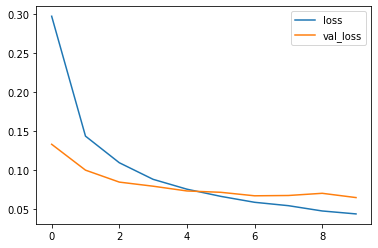

In [10]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

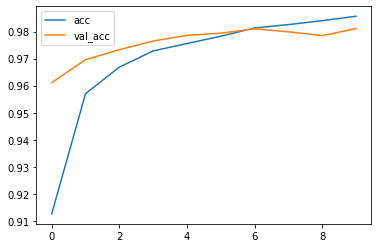

In [11]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [12]:
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 0s 1ms/step - loss: 0.0649 - accuracy: 0.9811
[0.06494249403476715, 0.9811000227928162]


Confusion matrix, without normalization
[[ 966    1    4    0    2    2    3    0    1    1]
 [   0 1127    3    1    0    1    1    0    2    0]
 [   1    3 1015    1    2    0    2    5    3    0]
 [   0    0    3  996    0    2    0    3    2    4]
 [   0    0    2    0  967    0    1    1    0   11]
 [   2    0    0    8    1  873    2    1    2    3]
 [   2    3    0    1    7    8  937    0    0    0]
 [   1    1    8    3    0    1    0 1003    2    9]
 [   1    0    3    8    5    5    2    3  943    4]
 [   0    2    0    5   11    3    0    3    1  984]]


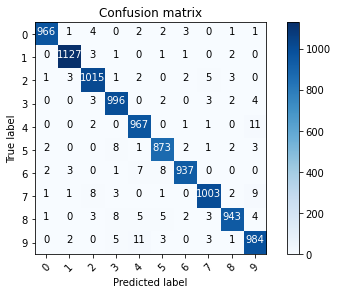

In [14]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
  
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

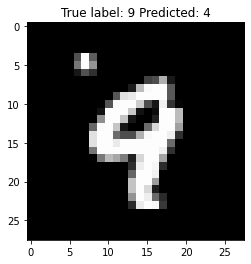

In [19]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));